In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('results.csv',index_col=0)

In [31]:
df

,secp256k1,l,h,standard_FALCON512,l.1,h.1,standard_FALCON1024,l.2,h.2,C-based_standard_FALCON512,...,h.3,C-based_standard_FALCON1024,l.4,h.4,pk-recovery_FALCON512,l.5,h.5,pk-recovery_FALCON1024,l.6,h.6
Keygen,14.901,14.893,14.911,361240.000,340010.000,387670.000,1828100.000,1796000.000,1864800.000,5172.500,...,5262.300,17205.000,16866.000,17837.000,349570.00,339330.000,360520.000,1910000.00,1830800.00,1996500.00
Signing,22.105,22.095,22.116,576.910,575.140,578.960,1147.900,1146.200,1150.000,156.220,...,157.620,309.510,308.950,310.130,574.87,574.330,575.420,1163.70,1160.70,1167.20
Verification,24.040,24.007,24.082,26.174,26.136,26.217,57.455,55.284,60.219,25.353,...,25.558,51.033,50.387,51.851,71.65,70.289,73.467,143.03,142.87,143.19


In [4]:
def parse_data(df: pd.DataFrame, func_string: str):
    idx_names = [0, 3, 6, 9, 12, 15, 18]
    idx_lower = [1 + i for i in idx_names]
    idx_higher = [2 + i for i in idx_names]
    categories = df.columns[idx_names]
    values = df.loc[[func_string],df.columns[idx_names]].values.tolist()[0]
    error_lower = df.loc[[func_string],df.columns[idx_lower]].values.tolist()[0]
    error_lower = [v-l for v,l in zip(values,error_lower)]
    error_higher = df.loc[[func_string],df.columns[idx_higher]].values.tolist()[0]
    error_higher = [h-v for h,v in zip(error_higher,values)]
    error = [error_lower,error_higher]
    
    return categories, values, error
    

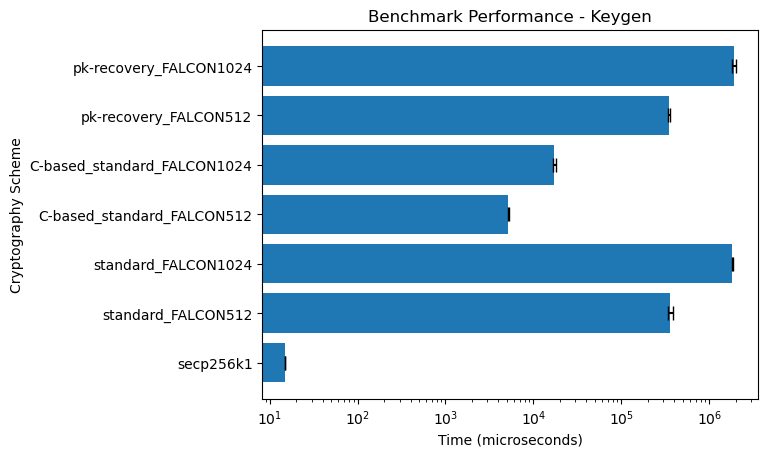

In [105]:
function_string = "Keygen"
categories, values, error = parse_data(df, function_string)
plt.barh(categories,values,xerr=error,align='center',capsize =5)
plt.ylabel("Cryptography Scheme")
if function_string == "Keygen":
    plt.xscale("log")
plt.xlabel("Time (microseconds)")
plt.title(f"Benchmark Performance - {function_string}")
plt.savefig(function_string+".png",format='png',bbox_inches='tight',dpi=300)
plt.show()


Memory Usage

In [90]:
df_mem = pd.read_csv("memory_usage.csv", index_col=0)
df_mem = df_mem.T
df_mem = df_mem.reset_index()
df_mem = df_mem.rename(columns = {"index": "Cryptography Scheme"})

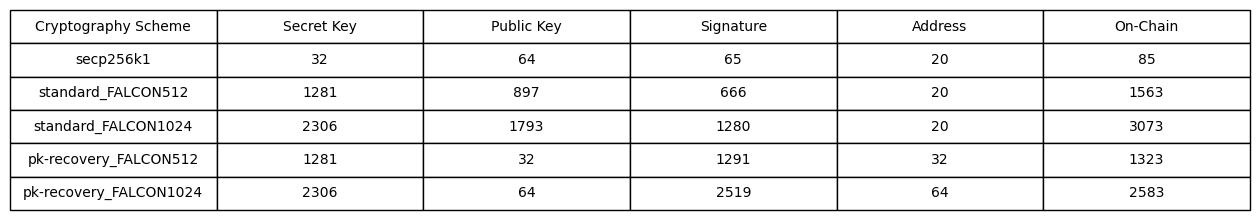

In [102]:
# Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
fig, ax = plt.subplots(figsize=(8,2))

# Hide the axes
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(
    cellText=df_mem.values,
    colLabels=df_mem.columns,
    cellLoc='center',
    loc='center'
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2,2)
# plt.title("Blockchain Application of Cryptographic Schemes Memory Usage")

# Save the table as an image
plt.savefig('memory_usage_table.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

In [100]:
df_gas = df_mem[["Cryptography Scheme","On-Chain"]].copy()
df_gas["Gas Estimate"] = df_gas["On-Chain"]*16
df_gas = df_gas.rename(columns={"On-Chain": "On-Chain Storage (bytes)"})

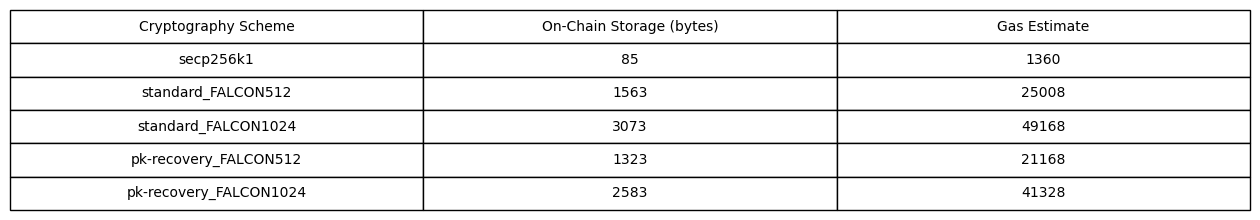

In [101]:
# Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
fig, ax = plt.subplots(figsize=(8,2))

# Hide the axes
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(
    cellText=df_gas.values,
    colLabels=df_gas.columns,
    cellLoc='center',
    loc='center'
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2,2)
# plt.title("Blockchain Application of Cryptographic Schemes Memory Usage")

# Save the table as an image
plt.savefig('gas_estimate_table.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

In [118]:
storage_summary = {"Ethereum Price (USD)": "2448",
 "Average Gas Cost (gwei)": "7.7",
 "Daily Txns (million)": "1.121",
 "Average Block Time (s)": "12.04",
 "Average Txns Per Block": "13",
 "Average Block Size (bytes)": "67644",
 "Average Block Size on pk-recovery_FALCON512": "83738",
"Average Cost Increase per Txn (USD)": "0.40"}

In [119]:
df_storage = pd.DataFrame(storage_summary, index=[0])
df_storage = df_storage.transpose()
df_storage = df_storage.reset_index()

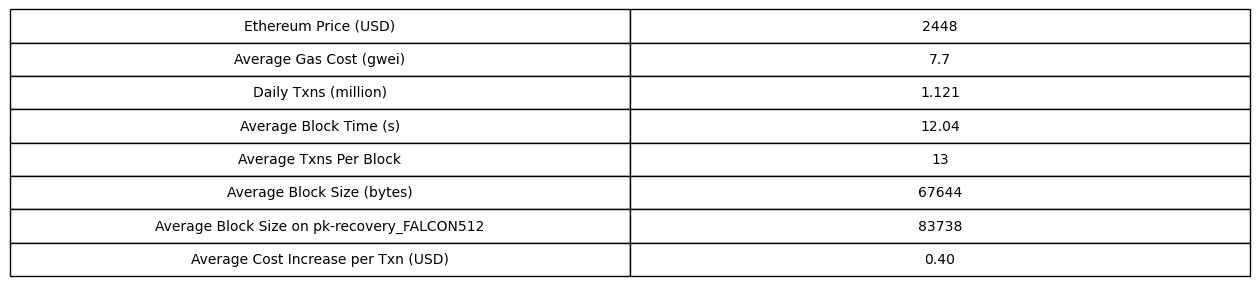

In [120]:
# Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
fig, ax = plt.subplots(figsize=(8,2))

# Hide the axes
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(
    cellText=df_storage.values,
    cellLoc='center',
    loc='center'
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2,2)
# plt.title("Blockchain Application of Cryptographic Schemes Memory Usage")

# Save the table as an image
plt.savefig('overall_storage_table.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()